In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_tree
import scipy
import networkx as nx

In [2]:
df = pd.io.parsers.read_csv(
    filepath_or_buffer='points.csv',
    header=None,
    sep=',',
    )
df.shape

(78, 3)

In [3]:
df

,0,1,2
0,0,0.577,0
1,0,1.732,0
2,1,0.000,0
3,1,2.309,0
4,2,0.577,0
...,...,...,...
73,1,12.309,2
74,2,10.577,2
75,2,11.732,2
76,10,11.000,2


In [4]:
df

,0,1,2
0,0,0.577,0
1,0,1.732,0
2,1,0.000,0
3,1,2.309,0
4,2,0.577,0
...,...,...,...
73,1,12.309,2
74,2,10.577,2
75,2,11.732,2
76,10,11.000,2


In [5]:
x=np.array(df)
x
df.shape

(78, 3)

In [6]:
x

array([[ 0.   ,  0.577,  0.   ],
       [ 0.   ,  1.732,  0.   ],
       [ 1.   ,  0.   ,  0.   ],
       [ 1.   ,  2.309,  0.   ],
       [ 2.   ,  0.577,  0.   ],
       [ 2.   ,  1.732,  0.   ],
       [ 3.   ,  0.   ,  0.   ],
       [ 3.   ,  2.309,  0.   ],
       [ 4.   ,  0.577,  0.   ],
       [ 4.   ,  1.732,  0.   ],
       [ 6.   ,  6.   ,  0.   ],
       [10.   , 10.   ,  0.   ],
       [10.   ,  0.577,  0.   ],
       [10.   ,  1.732,  0.   ],
       [11.   ,  0.   ,  0.   ],
       [11.   ,  2.309,  0.   ],
       [12.   ,  0.577,  0.   ],
       [12.   ,  1.732,  0.   ],
       [ 0.   , 10.577,  0.   ],
       [ 0.   , 11.732,  0.   ],
       [ 1.   , 10.   ,  0.   ],
       [ 1.   , 12.309,  0.   ],
       [ 2.   , 10.577,  0.   ],
       [ 2.   , 11.732,  0.   ],
       [10.   , 11.   ,  0.   ],
       [10.   , 12.   ,  0.   ],
       [ 0.   ,  0.577, 10.   ],
       [ 0.   ,  1.732, 10.   ],
       [ 1.   ,  0.   , 10.   ],
       [ 1.   ,  2.309, 10.   ],
       [ 2

In [7]:
n=df.shape[0]
d=np.zeros(n)

for c in range(n):
    d[c]=np.sqrt(x[c,0]*x[c,0]+x[c,1]*x[c,1]+x[c,2]*x[c,2]) 

In [8]:
d.shape

(78,)

In [9]:
main = np.hstack((d.reshape(n,1), x.reshape(n,3))).real
main


array([[ 0.577     ,  0.        ,  0.577     ,  0.        ],
       [ 1.732     ,  0.        ,  1.732     ,  0.        ],
       [ 1.        ,  1.        ,  0.        ,  0.        ],
       [ 2.51624343,  1.        ,  2.309     ,  0.        ],
       [ 2.08156888,  2.        ,  0.577     ,  0.        ],
       [ 2.64571805,  2.        ,  1.732     ,  0.        ],
       [ 3.        ,  3.        ,  0.        ,  0.        ],
       [ 3.78569426,  3.        ,  2.309     ,  0.        ],
       [ 4.04140186,  4.        ,  0.577     ,  0.        ],
       [ 4.35887875,  4.        ,  1.732     ,  0.        ],
       [ 8.48528137,  6.        ,  6.        ,  0.        ],
       [14.14213562, 10.        , 10.        ,  0.        ],
       [10.01663262, 10.        ,  0.577     ,  0.        ],
       [10.14888289, 10.        ,  1.732     ,  0.        ],
       [11.        , 11.        ,  0.        ,  0.        ],
       [11.2397278 , 11.        ,  2.309     ,  0.        ],
       [12.01386403, 12.

In [10]:
main_sorted_arg = np.argsort(main[:, 0])
main_sort_2 = main[main_sorted_arg]

In [11]:
#bond distance

# bond_distance = 1.732-.576
bond_distance = 2/ np.sqrt(3) + 0.001
bond_distance

1.1557005383792516

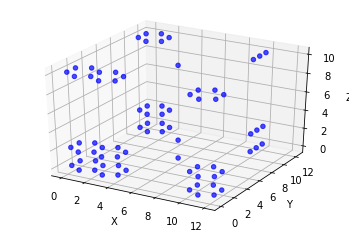

In [12]:
filtered = main_sort_2
np_filtered = np.asarray(filtered)
marker = np.arange(len(filtered))

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
x, y, z = np.loadtxt('points.csv', delimiter=',',unpack=True)
ax1.scatter(x,y,z, alpha=0.7, cmap='rainbow', marker='o',c='b')

plt.show()

In [13]:
# #find points in distance 5

# # filtered = [x for (x in mainSort and x[0] < 5)]

# # filtered = list(filter(lambda x: (x[0] < 5) , main_sort_2))
# filtered = main_sort_2
# np_filtered = np.asarray(filtered)
# marker = np.arange(len(filtered))
# np_filtered
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.scatter(
#     np_filtered[:,1],
#     np_filtered[:,2],
#     cmap='rainbow',
#     alpha=0.7,
#     edgecolors='c',
# )
# plt.xlim(-0.5,  14)
# plt.ylim(-0.5, 14)
# for x in marker:
#     plt.text(np_filtered[x][1], np_filtered[x][2], '({})'.format(x))


In [14]:
def checkDuplicate(neddleCycle, cycles):
    neddleCycle = np.asarray(neddleCycle)
    cycles = np.asarray(cycles)
    
    for cycle in cycles:
        if len(cycle) != neddleCycle.shape[0]:
            continue
        if np.all(np.isin(neddleCycle, cycle)):
            return True
        
    return False
    
graph = distance_matrix(np_filtered[:, 1:], np_filtered[:, 1:]) <= bond_distance
np.fill_diagonal(graph, False)

G = nx.DiGraph()
G = nx.from_numpy_matrix(graph, create_using=nx.DiGraph)
all_cycles = list(nx.simple_cycles(G))
cycles = []

for cycle in all_cycles:
    if len(cycle) > 2 and not checkDuplicate(cycle, cycles):
        cycles.append(cycle)
        
cycles


[[68, 74, 69, 63, 59, 62],
 [65, 71, 72, 67, 60, 58],
 [38, 48, 55, 50, 41, 30],
 [33, 45, 53, 52, 43, 29],
 [35, 46, 54, 47, 37, 25],
 [32, 36, 40, 39, 34, 28],
 [32, 36, 40, 39, 34, 28, 24, 23, 26, 31],
 [32, 31, 26, 23, 24, 28],
 [42, 49, 51, 44, 27, 22],
 [4, 8, 11, 12, 16, 19, 18, 13, 9, 5],
 [4, 8, 11, 12, 9, 5],
 [9, 13, 18, 19, 16, 12],
 [0, 2, 6, 7, 14, 17, 15, 10, 3, 1],
 [0, 2, 6, 7, 3, 1],
 [3, 10, 15, 17, 14, 7]]

In [15]:
start_node = 0
trees = []
i = 0
flags = np.ones((graph.shape[0]))
count = 0

while(True):
    Tcsr = depth_first_tree(X, start_node, directed=False)
    dfs_tree = Tcsr.toarray().astype(int)
#     print(np.nonzero(dfs_tree))
    tree = np.nonzero(dfs_tree)[1]
    trees.append(tree)
    flags[tree] = 0
    flags[start_node] = 0
    count += (tree.shape[0] + 1)
    
    rows, cols = np.where(dfs_tree == 1)
    edges = zip(rows.tolist(), cols.tolist())
    reverseEdges = zip(cols.tolist(), rows.tolist())
    nodes = np.hstack((start_node, tree))
#     print(nodes)
    print(list(edges))
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(list(edges))
    G.add_edges_from(list(reverseEdges))
    
#     nx.draw(G)
#     plt.show()
    
    print(list(nx.simple_cycles(G)))
    
    if np.sum(flags) == 0:
        break
    start_node = np.nonzero(flags)[0][0]
        
print(trees)
print(count)

NameError: name 'X' is not defined

In [ ]:
# graph2 = distance_matrix([[0,0,0,0],[0,1,2,3]], [[1,1,1,5],[2,2,2,7]])
# print(graph2)
def checkDuplicate(neddleCycle, cycles):
    neddleCycle = np.asarray(neddleCycle)
    cycles = np.asarray(cycles)
    
    for cycle in cycles:
        if len(cycle) != neddleCycle.shape[0]:
            continue
        if np.all(np.isin(neddleCycle, cycle)):
            return True
        
    return False

def checkDuplicates(neddleCycle, cycles):
    neddleCycle = np.asarray(neddleCycle)
    cycles = np.asarray(cycles)
    
    for cycle in cycles:
        if len(cycle) != neddleCycle.shape[0]:
            continue
        if np.all(np.isin(neddleCycle[0], cycle[0])):
            return True
        
    return False
    
graph = distance_matrix(np_filtered[:, 1:], np_filtered[:, 1:]) <= bond_distance
np.fill_diagonal(graph, False)
# df = pd.DataFrame(np.asarray(graph, dtype=np.uint8)[11:22, 11:22])
# df
# nodes = np.arange(graph.shape[0])
# edges_row, edges_col = np.where(graph == 1)
# edges = zip(edges_row.tolist(), edges_row.tolist())
# list(edges)
G = nx.DiGraph()
G = nx.from_numpy_matrix(graph, create_using=nx.DiGraph)
all_cycles = list(nx.simple_cycles(G))
cycles = []

for cycle in all_cycles:
    if len(cycle) > 2 and not checkDuplicate(cycle, cycles):
        cycles.append(cycle)
        
        
cycles
#cycles.append([21,22,23,44,55,66,77,88,99,100,1201])
cycles

In [ ]:
# for i in range(len(cycles)):
#     a[i]=len(cycles[i])
# # a=len(cycles[2])
# rings=np.array(cycles,dtype=np.int)
# rings
# np.asarray(rings[i])



# print(cycles)

ARnumber=np.unique(np.hstack(cycles)).shape[0]
ALnumber=df.shape[0]


# 6 membered ring == 4
# 


boro_array = []
choto_array = []

def isSubSet(current, toCompare):
    
    return np.in1d(toCompare,current).all()

i = 0
for r in cycles:
    if(len(r)) < 8:
        choto_array.append(r)
        i += 1
        continue
    if i > 0:
        prev_item = cycles[i-1]
        
        if isSubSet(r, prev_item):
            #remove r from cycle or do some other thing
            print("Subset paise agertay")
            print(r)
            print(prev_item)
            boro_array.append(r)
            i+=1
            continue
        
        
    if i < len(cycles)-1:
        next_item = cycles[i+1]
        
        if isSubSet(r, next_item):
            #remove r from cycle or do some other thing
            print("Subset paise porertay")
            print(r)
            print(next_item)
            boro_array.append(r)
            i+=1
            continue
        
    
    choto_array.append(r)
    
    i += 1
    
print("Boro array",boro_array)
print("Choto array",choto_array)


a = {}
b = {}


for r in choto_array:
    if len(r) in a:
        a[len(r)] = a[len(r)] + 1
    else:
        a[len(r)] = 1

for l in boro_array:
    if len(l) in b:
        b[len(l)] = b[len(l)] + 1
    else:
        b[len(l)] = 1

    


In [ ]:
ARnumber=np.unique(np.hstack(cycles)).shape[0]
ALnumber=df.shape[0]-ARnumber
print(a)
print(b)
print(ARnumber)
print(ALnumber)

In [ ]:
a